21BDS0181 PRATHEEK NISTALA

DIGITAL ASSIGNMENT 1

EXPLORATORATORY DATA ANALYSIS

SLOT - C1 



In [2]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\lulor\\Downloads\\indian_food.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
# Check the dimensions (rows and columns)
data.shape


(255, 9)

In [5]:
# Basic information about the dataset (data types, non-null counts, etc.)
data.info()

# Statistical summary for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            251 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          254 non-null    object
 7   state           255 non-null    object
 8   region          253 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


DATA CLEANING

In [6]:
# Check for missing values
data.isnull().sum()


name              0
ingredients       0
diet              4
prep_time         0
cook_time         0
flavor_profile    0
course            1
state             0
region            2
dtype: int64

In [7]:
# Filling missing values (if necessary) or dropping rows/columns
# Example: Filling missing values with mode for categorical data
data.fillna(data.mode().iloc[0], inplace=True)


UNIVARIATE, BIVARIATE, AND MULTIVARIATE ANALYSIS

C:\Users\lulor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


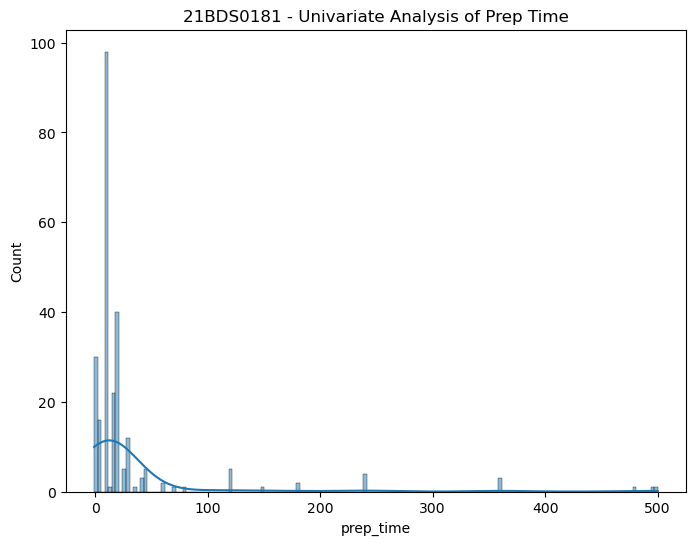

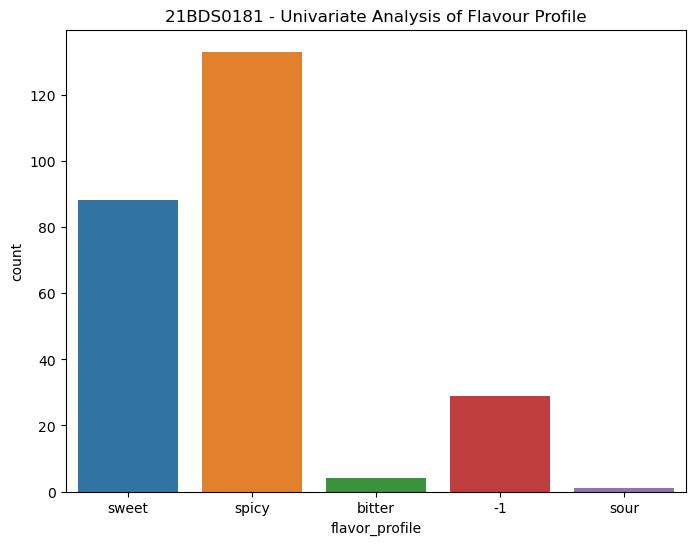

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of univariate analysis for a numerical variable
plt.figure(figsize=(8,6))
sns.histplot(data['prep_time'], kde=True)
plt.title('21BDS0181 - Univariate Analysis of Prep Time')
plt.show()

# Example of univariate analysis for a categorical variable
plt.figure(figsize=(8,6))
sns.countplot(x='flavor_profile', data=data)
plt.title('21BDS0181 - Univariate Analysis of Flavour Profile')
plt.show()


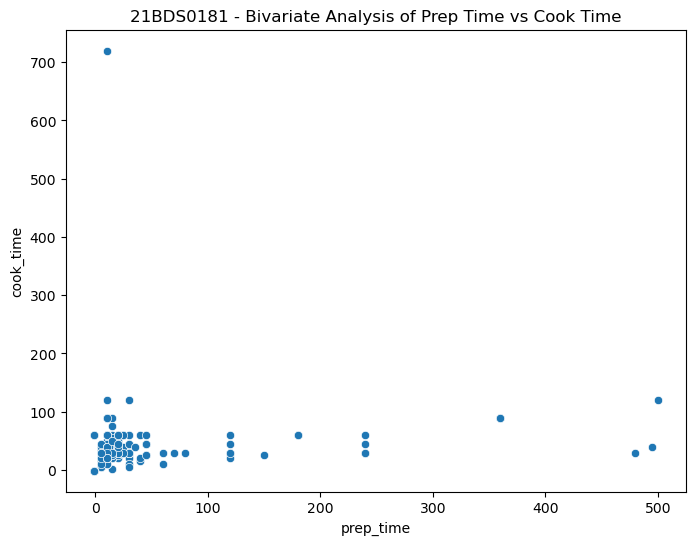

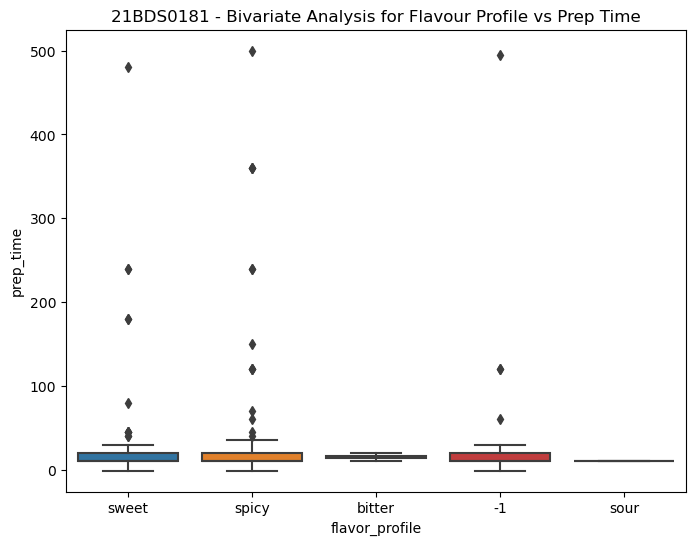

In [10]:
# Scatter plot for bivariate analysis between two numerical variables
plt.figure(figsize=(8,6))
sns.scatterplot(x='prep_time', y='cook_time', data=data)
plt.title('21BDS0181 - Bivariate Analysis of Prep Time vs Cook Time')
plt.show()

# Boxplot for bivariate analysis between a numerical and a categorical variable
plt.figure(figsize=(8,6))
sns.boxplot(x='flavor_profile', y='prep_time', data=data)
plt.title('21BDS0181 - Bivariate Analysis for Flavour Profile vs Prep Time')
plt.show()


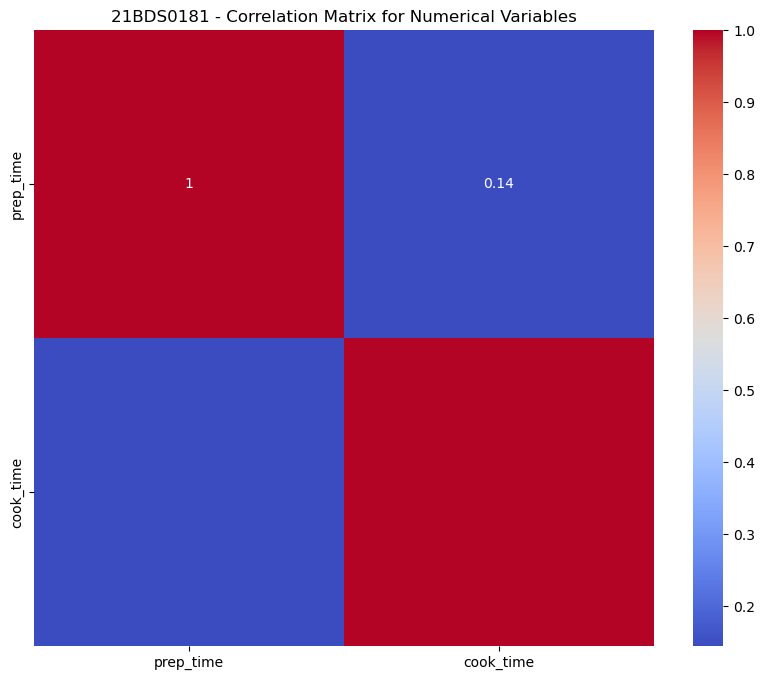

In [11]:
# Select only the numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Check the numerical columns and their correlations
corr_matrix = numerical_data.corr()

# Plot the heatmap for the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('21BDS0181 - Correlation Matrix for Numerical Variables')
plt.show()


CLUSTERING

C:\Users\lulor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lulor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


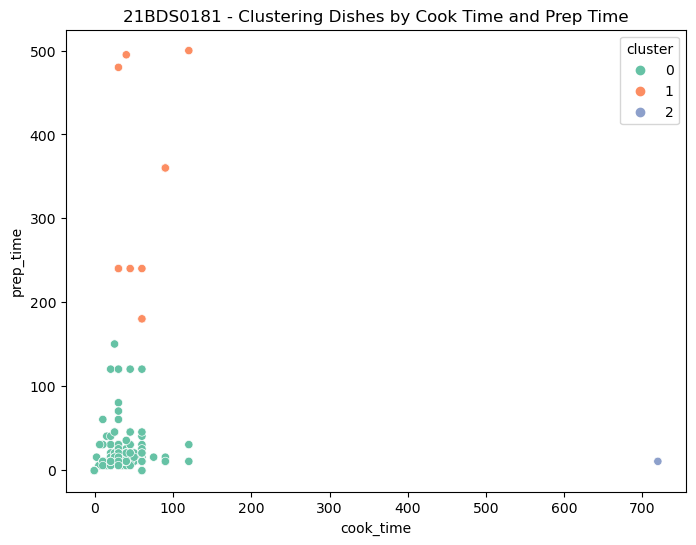

In [12]:
from sklearn.cluster import KMeans

# K-means clustering on numerical columns (e.g., cook_time and prep_time)
X = data[['cook_time', 'prep_time']].dropna()

kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(X)

# Visualizing clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='cook_time', y='prep_time', hue='cluster', data=data, palette='Set2')
plt.title('21BDS0181 - Clustering Dishes by Cook Time and Prep Time')
plt.show()


DIMENSIONALITY REDUCTION

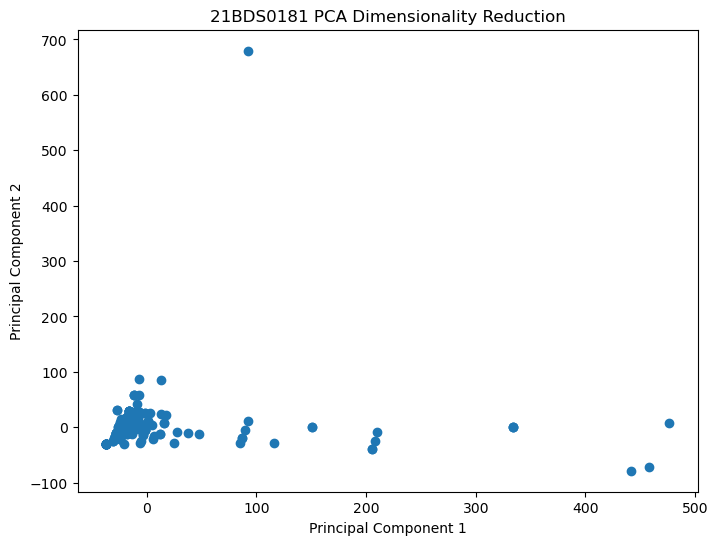

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' is a DataFrame and you're selecting specific columns
# Replace 'another_column' with the actual column you want to use
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[['prep_time', 'cook_time']])

# Visualizing PCA components
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('21BDS0181 PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



MODEL DEVELOPMENT

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming we want to predict cooking time based on prep time (modify as needed)
X = data[['prep_time']]
y = data['cook_time']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 498.30843850328876
